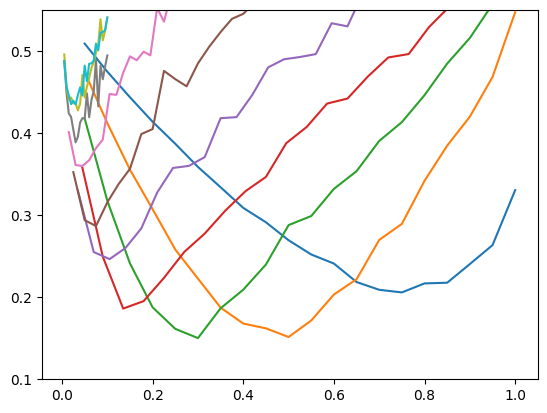

In [122]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

class RandomWalk:
    def __init__(self) -> None:
        self.state = 9
        pass
    
    def action_shape(self):
        return 2
    
    def state_shape(self):
        return 19
    
    def reset(self):
        self.state = 9
        return self.state
    
    def step_(self, action):
        new_state = self.state + (-1 if action == 0 else 1)
        if new_state == -1:
            reward = -1
        elif new_state == 19:
            reward = 1
        else:
            reward = 0
        terminated = new_state == -1 or new_state == 19
        self.state = 9 if terminated else new_state
        return terminated, reward, new_state
    
    def step(self):
        return self.step_(random.choice(range(2)))

def calc_true_values(n, left, right):
    length = right - left
    return [(i + 1) / (n + 1) * length + left for i in range(n)]


def td0_evaluating_state_values(env, num_episodes, alpha, gamma = 1.0):
    state_shape = env.state_shape()
    vs = np.zeros(state_shape)
    for episode in range(num_episodes):
        state = env.reset()
        while True:
            terminated, reward, new_state = env.step()
            v_prime = 0 if terminated else vs[new_state]
            vs[state] += (reward + gamma * v_prime - vs[state]) * alpha
            #print(state, terminated, reward, new_state, v_prime, vs[state])
            state = new_state
            if terminated:
                break
    return vs

def evaluate_n_step_td(n, env, num_episodes, alpha, gamma = 1.0):
    assert(n > 0)
    state_shape = env.state_shape()
    vs = np.zeros(state_shape)
    rewards = np.zeros(n, dtype=float)
    states = np.zeros(n, dtype=int)
    for episode in range(num_episodes):
        state = env.reset()
        terminated = False
        reward_count = n
        t = 0
        while True:
            if not terminated:
                terminated, reward, new_state = env.step()
                states[t%n] = state
                rewards[t%n] = reward
                state = new_state
                terminated_t = t 
            elif t >= terminated_t + n:
                break

            if t + 1 >= n:
                tao = t + 1 - n
                last_reward_t = terminated_t if terminated else t
                v_prime = 0 if terminated else vs[new_state]
                g = v_prime * gamma + reward
                for i in range(last_reward_t - 1, tao - 1, -1):
                    g = g * gamma + rewards[i%n]
                s_tao = states[tao%n]
                vs[s_tao] += (g - vs[s_tao]) * alpha
                #print(s_tao, terminated, reward, new_state, v_prime, vs[s_tao])
            t += 1
    return vs

true_values = calc_true_values(19,-1,1)
#plt.plot(range(len(true_values)), true_values)

env = RandomWalk()
#vs = evaluate_n_step_td(3, env, 1, 0.21)
#plt.plot(range(len(vs)), vs)


'''random.seed(0)
vs = td0_evaluating_state_values(env, 1, 0.21)
plt.plot(range(len(vs)), vs)
'''

params=[
    [1, [], "#FF0000"],
    [2, [], "#00FF00"],
    [4, [], "#0000FF"],
    [8, [], "#000000"],
    [16, [], "#FF00FF"],
    [32, [], "#00FFFF"],
    [64, [], "#800080"],
    [128, [], "#FF00FF"],
    [256, [], "#FF8000"],
    [512, [], "#008000"],
]

plt.ylim((0.1,0.55))

repetition = 1
alphas = [math.exp(i/10) for i in range(-50, 1, 1)]

for param in params:
    step = param[0]
    rmses = param[1]
    for alpha in alphas:
        rmse = 0
        for run in range(repetition):
            vs = evaluate_n_step_td(step, env, 10, alpha)
            rmse += np.sqrt(np.power((vs - true_values),2.0).mean())
        rmses.append(rmse/repetition)

for param in params:
    rmses = param[1]
    color = param[2]
    plt.plot(alphas, rmses, color, linewidth = 0.5)

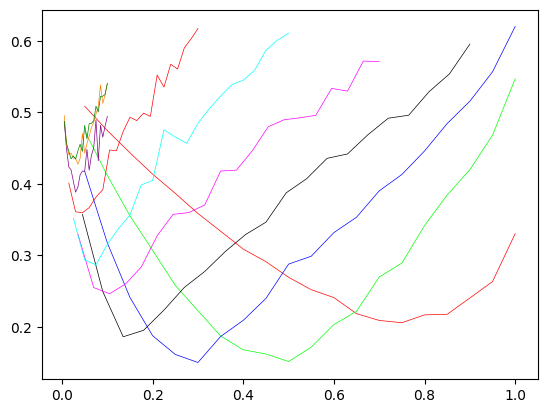

In [125]:
for param in params:
    max_alpha = param[1]
    rmses = param[2]
    color = param[3]
    alphas = [(a+1)/alpha_count*max_alpha for a in range(alpha_count)]
    plt.plot(alphas, rmses, color, linewidth = 0.5)

In [4]:
import math
alphas = [math.exp(i/10) for i in range(-50, 1, 1)]
alphas


[0.006737946999085467,
 0.007446583070924338,
 0.00822974704902003,
 0.009095277101695816,
 0.010051835744633586,
 0.011108996538242306,
 0.012277339903068436,
 0.013568559012200934,
 0.014995576820477703,
 0.016572675401761255,
 0.01831563888873418,
 0.02024191144580439,
 0.0223707718561656,
 0.024723526470339388,
 0.02732372244729256,
 0.0301973834223185,
 0.03337326996032608,
 0.036883167401240015,
 0.04076220397836621,
 0.0450492023935578,
 0.049787068367863944,
 0.05502322005640723,
 0.06081006262521797,
 0.06720551273974976,
 0.07427357821433388,
 0.0820849986238988,
 0.09071795328941251,
 0.10025884372280375,
 0.11080315836233387,
 0.1224564282529819,
 0.1353352832366127,
 0.14956861922263506,
 0.16529888822158653,
 0.18268352405273466,
 0.20189651799465538,
 0.22313016014842982,
 0.2465969639416065,
 0.2725317930340126,
 0.30119421191220214,
 0.33287108369807955,
 0.36787944117144233,
 0.4065696597405991,
 0.44932896411722156,
 0.4965853037914095,
 0.5488116360940265,
 0.606530